In [18]:
!pip install factor-analyzer


In [20]:
# Install and import necessary packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Read the dataset
survey_df = pd.read_csv("E:/BOOTCAMP/ASSIGNMENTS/SCMA/Survey.csv")

In [22]:
# Inspect the dataset
print(survey_df.shape)
print(survey_df.columns)
print(survey_df.head())
print(survey_df.info())

(70, 50)
Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Av

In [23]:
# Check for missing values
print(survey_df.isna().sum().sum())

0


In [24]:
# Select the relevant columns for PCA and FA
sur_int = survey_df.iloc[:, 19:46]
print(sur_int.info())
print(sur_int.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   3. Proximity to transport                  70 non-null     int64  
 1   4. Proximity to work place                 70 non-null     int64  
 2   5. Proximity to shopping                   70 non-null     int64  
 3   1. Gym/Pool/Sports facility                70 non-null     int64  
 4   2. Parking space                           70 non-null     int64  
 5   3.Power back-up                            70 non-null     int64  
 6   4.Water supply                             70 non-null     int64  
 7   5.Security                                 70 non-null     int64  
 8   1. Exterior look                           70 non-null     int64  
 9   2. Unit size                               70 non-null     int64  
 10  3. Interior design and brand

In [26]:
# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int)

In [27]:
# Print PCA components and explained variance
print("PCA Components:")
print(pca.components_)
print("Explained Variance:")
print(pca.explained_variance_ratio_)

PCA Components:
[[-1.57689856e-06  5.55894608e-06  1.05080528e-05  1.39319294e-05
   9.35706518e-06  6.86415635e-06  1.05540528e-05  9.80449080e-06
   1.89459281e-05  1.24239369e-06  1.39345945e-05  1.42888095e-05
   1.95424390e-05  5.77502892e-06 -3.57194801e-07 -1.05276112e-06
  -4.31509529e-06 -2.42885852e-06  1.17506016e-05  4.68555628e-06
   1.28568380e-05  1.42221580e-05  9.63549561e-06  1.67898456e-02
   1.15881031e-03  7.67261222e-01  6.41113854e-01]
 [ 2.15326795e-05 -4.49780381e-06 -1.72724773e-06 -2.84515510e-06
  -2.17269674e-05  7.45510225e-06  1.07087712e-05  5.93441043e-06
  -6.25576995e-06  9.14329020e-07 -9.59699778e-06 -1.24841971e-05
   2.41495559e-06 -4.60616000e-06  2.58061532e-05  7.20490596e-06
  -1.03771287e-05  7.34049755e-06 -1.59478266e-05 -1.04508416e-05
  -3.61693347e-06  1.00340733e-05  9.75473960e-05  8.15659734e-03
   1.82672183e-04  6.41078051e-01 -7.67432314e-01]
 [-2.89806537e-04 -6.21365964e-04 -8.35628573e-05 -1.56834133e-04
   1.78705053e-04  1.047

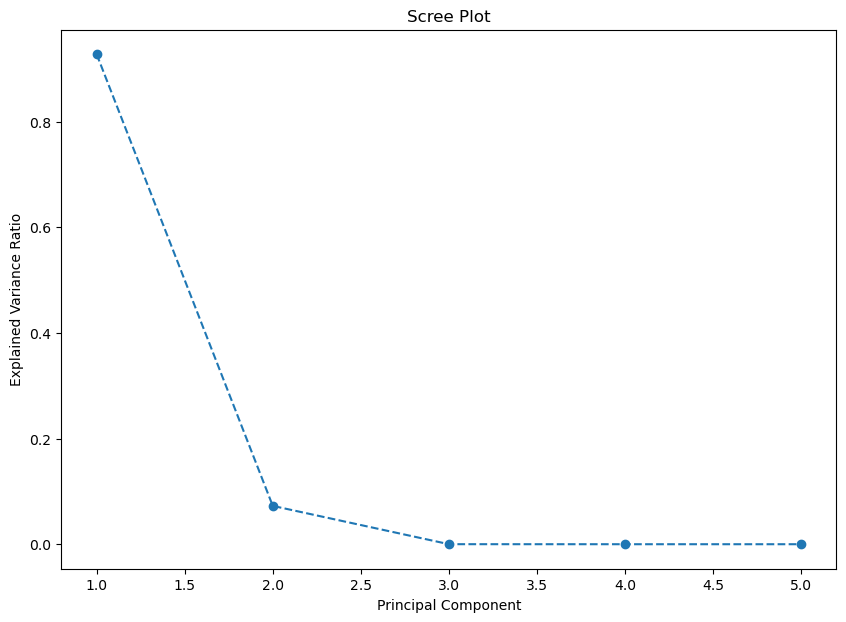

In [28]:
# Scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

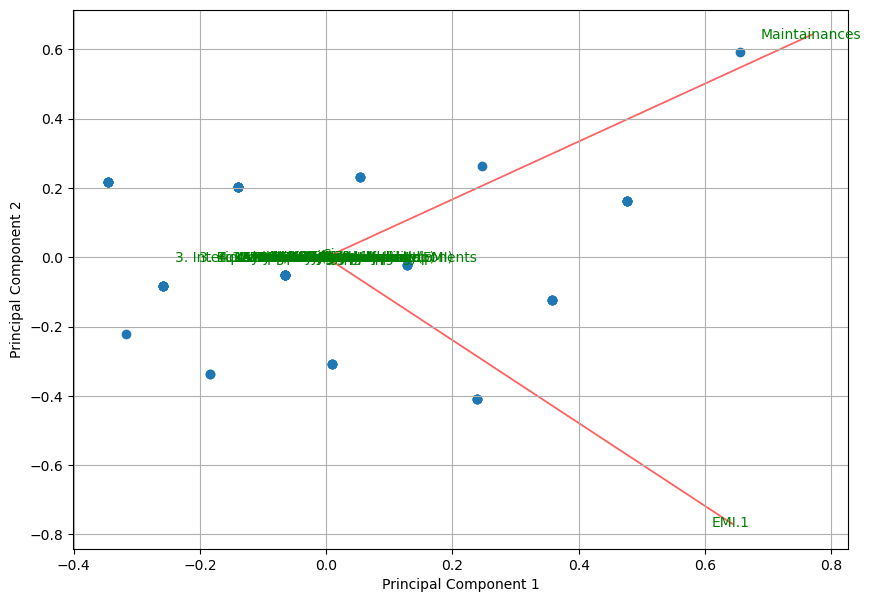

In [29]:
# Biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(10, 7))
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0], coeff[i, 1], "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0], coeff[i, 1], labels[i], color='g', ha='center', va='center')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

biplot(pca_result, np.transpose(pca.components_), labels=sur_int.columns)


In [30]:
# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(sur_int)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [31]:

# Print Factor Analysis loadings, communality, and scores
print("Factor Loadings:")
print(fa.loadings_)
print("Communality:")
print(fa.get_communalities())
fa_scores = fa.transform(sur_int)
print("Factor Scores:")
print(fa_scores)

Factor Loadings:
[[-0.08623576 -0.08097401  0.05315632  0.53865209]
 [-0.04707896  0.28171261 -0.01654391 -0.01672453]
 [ 0.6905913   0.14264745  0.28810837 -0.06920569]
 [ 0.46651738  0.16352419 -0.12485364  0.23247143]
 [ 0.51962226  0.24855043 -0.14283398  0.03864646]
 [ 0.36211264  0.23805115  0.04245436 -0.02913032]
 [ 0.34740792  0.36086054 -0.03312095  0.66001611]
 [ 0.75282616 -0.10094499 -0.08331999  0.3846903 ]
 [ 0.67108357  0.29439858  0.30171478 -0.34424643]
 [ 0.06500836  0.1496368  -0.10846898 -0.01470873]
 [ 0.61153682  0.43213105 -0.04932627 -0.02471042]
 [ 0.40487719  0.55433414 -0.08677656 -0.09343654]
 [ 0.75646745  0.32873909 -0.0179094  -0.0272586 ]
 [ 0.05460304  0.40691287 -0.06720388  0.43833868]
 [ 0.080124   -0.01917882  0.51626193 -0.1381047 ]
 [-0.0867624  -0.05489171  0.52029272  0.24907904]
 [-0.04512192 -0.14102083  0.30281758 -0.048089  ]
 [-0.14555111  0.00722171  0.87170747 -0.09429573]
 [ 0.2035555   0.57780858 -0.15702557  0.23438127]
 [ 0.23101554 

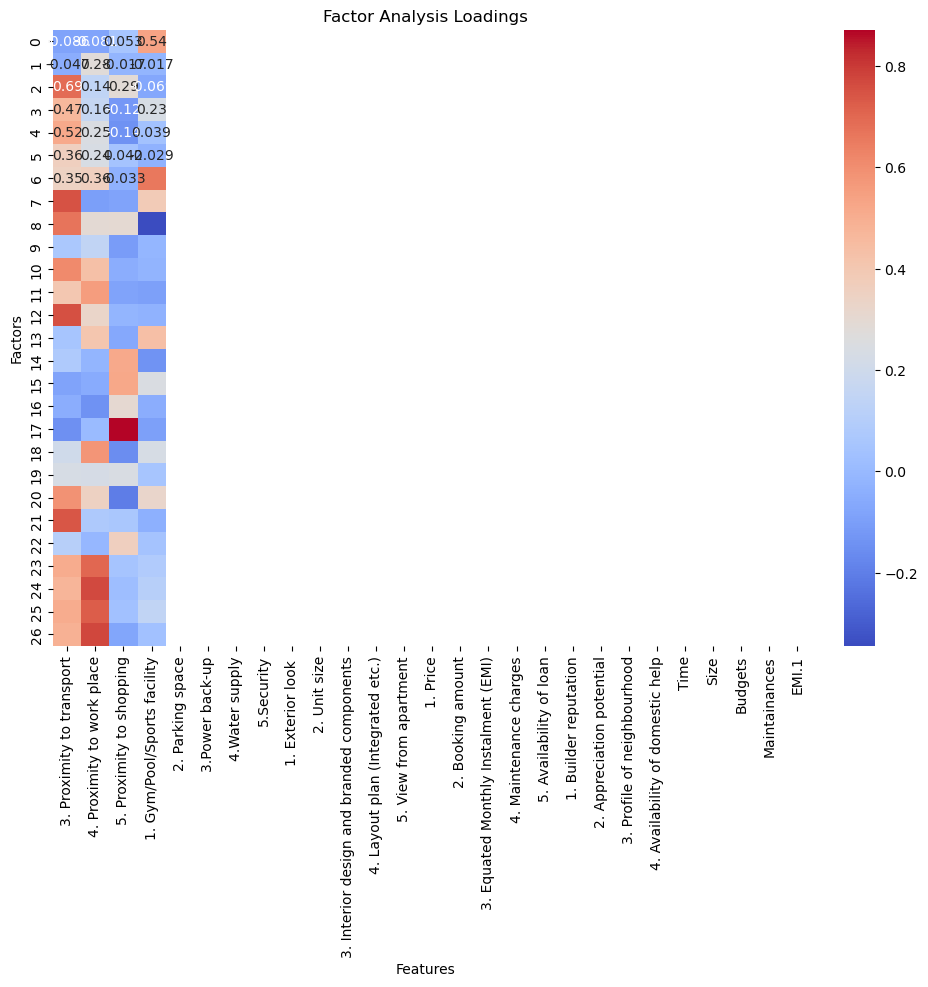

In [32]:

# Factor Analysis Diagram
plt.figure(figsize=(12, 8))
sns.heatmap(fa.loadings_, annot=True, cmap='coolwarm', cbar=True, xticklabels=sur_int.columns)
plt.title('Factor Analysis Loadings')
plt.xlabel('Features')
plt.ylabel('Factors')
plt.show()